In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [3]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', max_df=0.9, strip_accents='ascii')

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 5901)

### fit Kmeans

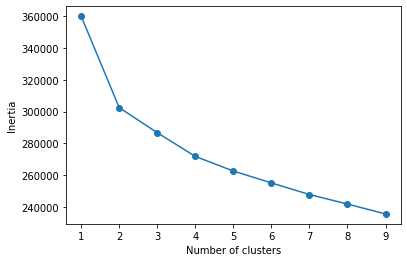

In [5]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

clusterVal = 10
# km = KMeans(n_clusters=clusterVal,n_init=30,n_jobs=-1)
# km.fit(X)

# print out plot for testing different numbers of clusters
distortions = []
for i in range(1, clusterVal):
    km = KMeans(n_clusters=i,n_init=30,n_jobs=-1)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, clusterVal), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [6]:
km.labels_

array([2, 2, 2, ..., 2, 0, 0], dtype=int32)

### take a look at one of the cluster results

In [7]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

sampleLen = 5
for x in range(0,clusterVal):
    count = 0
    sample = []
    
    for i in range(0,len(km.labels_)):
        if km.labels_[i] == x:
            count += 1
            if count < sampleLen:
                sample.append(raw_data['product_description'][i])
    
    print('**********')
    print('Cluster ' + str(x))
    print('Count ' + str(count))
    print('Sample of ' + str(sampleLen) + ' Descriptions\n')
    for i in range(0,len(sample)):
        print(sample[i] + '\n')
        
    


    

**********
Cluster 0
Count 449
Sample of 5 Descriptions

Salsa in 12 oz., 16 oz., and 5 lb. plastic containers.  The product labels reads as follows: PREMIUM QUALITY Private Selection Natural***SALSA NO PRESERVATIVES KEEP REFRIGERATED NET WT 12 OZ (340g)***INGREDIENTS: Tomatoes***Jalapeno***DISTRIBUTED BY: INTER-AMERICAN PRODUCTS, CINCINNATI, OHIO 45202***1-800-697-2448***" and PREMIUM QUALITY Private Selection Natural PICO DE GALLO NO PRESERVATIVES KEEP REFRIGERATED NET WT 12 OZ (340g)***INGREDIENTS: Tomatoes***Jalapeno***DISTRIBUTED BY: INTER-AMERICAN PRODUCTS, CINCINNATI, OHIO 45202***1-800-697-2448*** and heinens" Fresh***Salsa All Natural Net. Wt. 16oz. (1lb) 454g***Ingredients: Tomatoes***Jalapeno***PACKED FOR HEINENS BY CLUB CHEF, LLC and heinens" Fresh Bruschetta All Natural Net. Wt. 16oz. (1lb) 454g ***Ingredients: Tomatoes***Jalapeno***PACKED FOR HEINENS BY CLUB CHEF, LLC

Diced Celery and Onion, 7 oz, UPC 643550000429;    Diced Celery and Onion, 19 oz, UPC 6435500

**********
Cluster 7
Count 8
Sample of 5 Descriptions

Italian Green Beans. Product is IQF frozen, not ready to eat, each label carries cooking instructions.      Packages sizes: 14 oz.; 16 oz.; 2 lbs.; 2.5 lbs.; 20 lbs. and 1,350 lbs. (tote)    Product is sold under brands: Birds Eye (C&W), Markson First Crop, Bountiful Harvest, River Valley, Simplot Classic, Sysco Classic, Sysco Imperial, National, Monarch, Valamont, Worlds Finest, Tasteful and totes .    Labels read in part:   Item # 70332-00052 (not on label).    "***BIRDS EYE C&W ***cut italian green beans***14oz***(UPC) 0 70332 00052 8***" Proof, of bag label. provided. Shipper case UPC Code 10070332000525.    Item # 23234-13195 (not on label).    "***12/2 LB***334400***MARKSON FIRST CROP*** Case label and proof of generic bag label provided.  Generic labels are stamped with Net Wt.. during production. No UPC Code - Generic Bag; Shipper Case UPC Code 10723234131957.    Item # 22486-11893 is contained on case label  "***12/2.5 LB 